<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-09-21 05:08:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  24.8MB/s    in 1.4s    

2021-09-21 05:08:32 (24.8 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


### Question 1 from quiz

Majority of the survey responders are:

In [24]:
QUERY = """
SELECT DevType, COUNT(*) as count
FROM DevType
GROUP BY DevType
ORDER BY count DESC
"""
pd.read_sql_query(QUERY,conn)

,DevType,count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


## Demo: How to describe a table


In [11]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])                                               

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <a list of 10 Patch objects>)

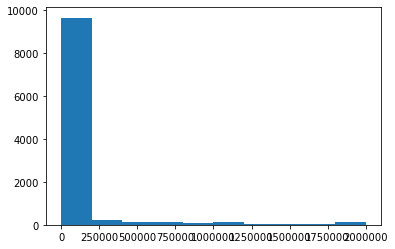

In [32]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

QUERY = """
SELECT *
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
plt.hist(df['ConvertedComp'])

### Box Plots


Plot a box plot of `Age.`


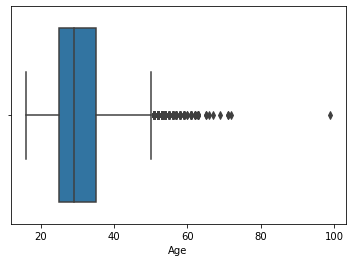

In [35]:
# your code goes here
ax = sns.boxplot(x = 'Age', data=df)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


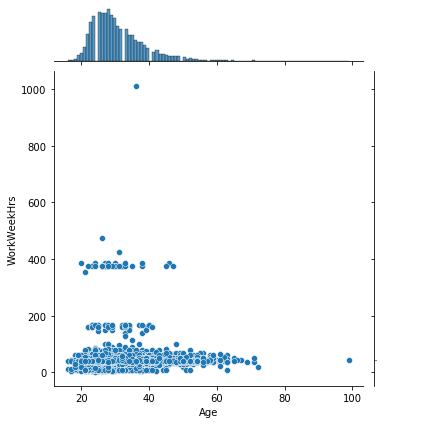

In [36]:
# your code goes here
plot = sns.jointplot(x = 'Age', y = 'WorkWeekHrs', data = df)                       

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Text(0.5, 1.0, 'Bubble Plot')

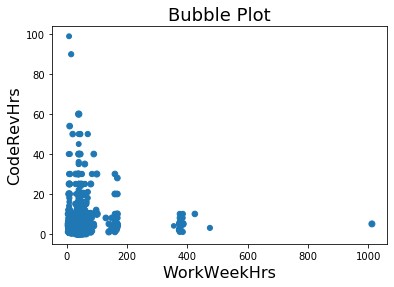

In [37]:
# your code goes here
plt.scatter(x = 'WorkWeekHrs', y = 'CodeRevHrs', s='Age', data = df)
plt.xlabel("WorkWeekHrs", size=16)
plt.ylabel("CodeRevHrs", size=16)
plt.title("Bubble Plot", size=18)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


               DatabaseDesireNextYear
PostgreSQL                       4328
MongoDB                          3649
Redis                            3331
MySQL                            3281
Elasticsearch                    2856


([<matplotlib.patches.Wedge at 0x7fcdd1db3150>,
 [Text(0.782460943602955, 0.7731460869305189, 'PostgreSQL'),
  Text(-0.6614558538043755, 0.8789062256395301, 'MongoDB'),
  Text(-1.0401617758478325, -0.35785958149123726, 'Redis'),
  Text(-0.05356333651009637, -1.0986951210330855, 'MySQL'),
  Text(0.9576877798968915, -0.5411414937298409, 'Elasticsearch')],
 [Text(0.4267968783288845, 0.42171604741664664, '24.8%'),
  Text(-0.36079410207511386, 0.47940339580338004, '20.9%'),
  Text(-0.5673609686442722, -0.1951961353588567, '19.1%'),
  Text(-0.02921636536914347, -0.5992882478362284, '18.8%'),
  Text(0.5223751526710316, -0.2951680874890041, '16.4%')])

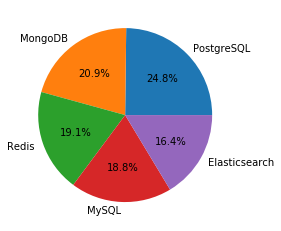

In [38]:
# your code goes here
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df2 = pd.read_sql_query(QUERY,conn)
data = df2['DatabaseDesireNextYear'].value_counts().head(5).to_frame()
print(data)

plt.pie(data['DatabaseDesireNextYear'], labels=list(data.index),autopct='%1.1f%%')

### Question 2 from quiz

In the list of most popular languages respondents wish to learn next year, what is the rank of Python?

In [42]:
QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""
df2 = pd.read_sql_query(QUERY,conn)

Python_rank = df2['LanguageDesireNextYear'].value_counts().head(10).to_frame()
print(Python_rank)

                       LanguageDesireNextYear
JavaScript                               6630
HTML/CSS                                 5328
Python                                   5239
SQL                                      5012
TypeScript                               4088
C#                                       3591
Bash/Shell/PowerShell                    3097
Java                                     2953
Go                                       2759
Kotlin                                   1890


### Question 3 from quiz

How many respondents indicated that they work on MySQL only

In [17]:
QUERY = """
SELECT Respondent, DatabaseDesireNextYear
FROM (SELECT Respondent, DatabaseDesireNextYear
    FROM DatabaseDesireNextYear
    GROUP BY Respondent
    HAVING COUNT(Respondent) = 1)
WHERE DatabaseDesireNextYear LIKE 'MySQL'
"""
df3 = pd.read_sql_query(QUERY,conn)
print(df3)

     Respondent DatabaseDesireNextYear
0            25                  MySQL
1           411                  MySQL
2           503                  MySQL
3           643                  MySQL
4           667                  MySQL
..          ...                    ...
248       24651                  MySQL
249       24679                  MySQL
250       24764                  MySQL
251       24890                  MySQL
252       25007                  MySQL

[253 rows x 2 columns]


### Question 4 from quiz

How many respondents indicated that they currently work with 'SQL'?

In [44]:
QUERY = """
SELECT Respondent, LanguageWorkedWith
FROM LanguageWorkedWith
WHERE LanguageWorkedWith LIKE 'SQL'
"""
df3 = pd.read_sql_query(QUERY,conn)
print(df3)
print(df3['Respondent'].count())

      Respondent LanguageWorkedWith
0              4                SQL
1              9                SQL
2             13                SQL
3             19                SQL
4             20                SQL
...          ...                ...
7101       25134                SQL
7102       25136                SQL
7103       25137                SQL
7104       25138                SQL
7105       25141                SQL

[7106 rows x 2 columns]
7106


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<function matplotlib.pyplot.show(close=None, block=None)>

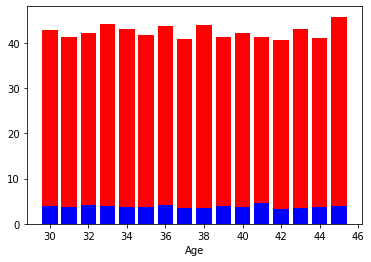

In [64]:
# your code goes here

QUERY = """
SELECT SUM(WorkWeekHrs)/COUNT(*) as `MedianWorkWeekHrs`, SUM(CodeRevHrs)/COUNT(*) as `MedianCodeRevHrs`, Age, COUNT(*) as Count
FROM master
WHERE age >= 30 and  age <= 45
group by age
order by age
"""

#df['Median'] = df['WorkWeekHrs']/df['Count']
#df['Median'] = df['CodeRevHrs']/df['Count']

df = pd.read_sql_query(QUERY,conn)
df.head(20)

x = df['Age']
y1 = df['MedianWorkWeekHrs']
y2 = df['MedianCodeRevHrs']

plt.bar(x, y1, color = 'r')
plt.bar(x, y2, color = 'b')
plt.xlabel("Age")

plt.show


CodeRevHrs## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


           Median   Age
0   171943.211765  45.0
1   214150.424242  46.0
2   131645.102941  47.0
3   152337.421875  48.0
4   204949.500000  49.0
5   140609.578947  50.0
6   114894.000000  51.0
7   236542.804878  52.0
8   233084.562500  53.0
9   133188.038462  54.0
10  138931.000000  55.0
11   94362.937500  56.0
12  115953.363636  57.0
13  332839.833333  58.0
14  318392.545455  59.0


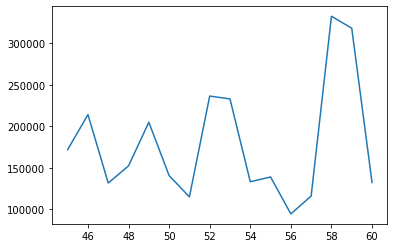

In [45]:
# your code goes here
QUERY = """
SELECT SUM(ConvertedComp)/COUNT(*) as Median,age
FROM master
WHERE age >= 45 and  age <= 60
group by age
order by age
"""
df = pd.read_sql_query(QUERY,conn)
print(df.head(15))

plt.plot(df['Age'],df['Median'])
plt.show()

### Question 5 from quiz
Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp? 


          Median   Age
0   78731.325203  25.0
1   90823.498611  26.0
2  111852.631215  27.0
3  105650.818297  28.0
4  143211.183644  29.0
5  117024.230415  30.0


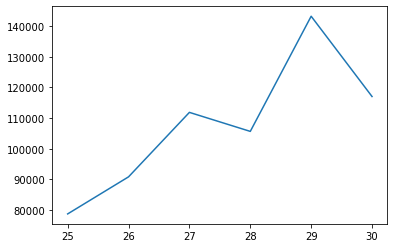

Correlation is positive


In [46]:
QUERY = """
SELECT SUM(ConvertedComp)/COUNT(*) as Median,age
FROM master
WHERE age >= 25 and  age <= 30
group by age
order by age
"""
df = pd.read_sql_query(QUERY,conn)
print(df.head(15))

plt.plot(df['Age'],df['Median'])
plt.show()
print('Correlation is positive')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<BarContainer object of 56 artists>

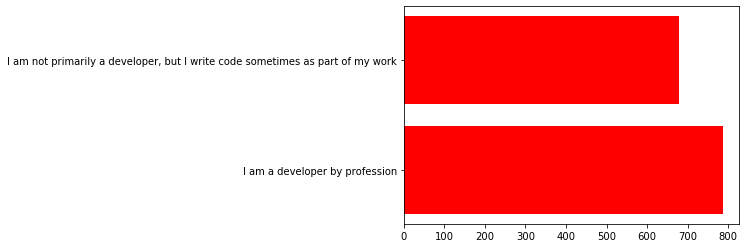

In [48]:
# your code goes here

QUERY = """
SELECT MainBranch, COUNT(*) as Count
FROM master
group by age
order by age
"""
df = pd.read_sql_query(QUERY,conn)
df.head(20)

plt.barh(df['MainBranch'], df['Count'], color = 'r')

Close the database connection.


In [49]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
